# Import resources

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns

# DATA DESCRIPTION


#### The ventilator data used in this competition was produced using a modified open-source ventilator connected to an artificial bellows test lung via a respiratory circuit. The diagram below illustrates the setup, with the two control inputs highlighted in green and the state variable (airway pressure) to predict in blue. The first control input is a continuous variable from 0 to 100 representing the percentage the inspiratory solenoid valve is open to let air into the lung (i.e., 0 is completely closed and no air is let in and 100 is completely open). The second control input is a binary variable representing whether the exploratory valve is open (1) or closed (0) to let air out.


#### In this competition, participants are given numerous time series of breaths and will learn to predict the airway pressure in the respiratory circuit during the breath, given the time series of control inputs.


![](
https://raw.githubusercontent.com/google/deluca-lung/main/assets/2020-10-02%20Ventilator%20diagram.svg)

# Let's talk a little about the basic features.

* #### **breath_id** - globally-unique time step for breaths


* #### **R** - lung attribute indicating how restricted the airway is (in cmH2O/L/S). Physically, this is the change in pressure per change in flow (air volume per time). Intuitively, one can imagine blowing up a balloon through a straw. We can change R by changing the diameter of the straw, with higher R being harder to blow.


* #### **C** - lung attribute indicating how compliant the lung is (in mL/cmH2O). Physically, this is the change in volume per change in pressure. Intuitively, one can imagine the same balloon example. We can change C by changing the thickness of the balloon’s latex, with higher C having thinner latex and easier to blow.


* #### **time_step** - the actual time stamp.


* #### **u_in** - the control input for the inspiratory solenoid valve. Ranges from 0 to 100.


* #### **u_out** - the control input for the exploratory solenoid valve. Either 0 or 1.


* #### **pressure** - the airway pressure measured in the respiratory circuit, measured in cmH2O.

# Creating dataframe

In [2]:
df_train=pd.read_csv(r"../input/ventilator-pressure-prediction/train.csv",encoding='latin-1')

In [3]:
df_train.head()

,id,breath_id,R,C,time_step,u_in,u_out,pressure
0,1,1,20,50,0.000000,0.083334,0,5.837492
1,2,1,20,50,0.033652,18.383041,0,5.907794
2,3,1,20,50,0.067514,22.509278,0,7.876254
3,4,1,20,50,0.101542,22.808822,0,11.742872
4,5,1,20,50,0.135756,25.355850,0,12.234987


# PRESSURE

## Plotting total pressure

<AxesSubplot:xlabel='pressure', ylabel='Count'>

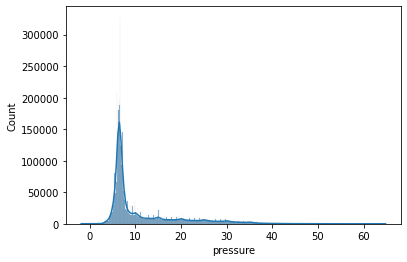

In [4]:
sns.histplot((df_train['pressure']), kde=True)

## Plotting pressure of a time series

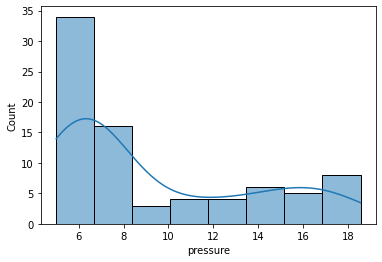

In [5]:
def pressure_local(df,value):
    df_loc = df.loc[df['breath_id'] == value]
    sns.histplot(df_loc['pressure'], kde=True)

pressure_local(df_train,2)

# U_IN

## Histogram total u_in 

<AxesSubplot:xlabel='u_in', ylabel='Count'>

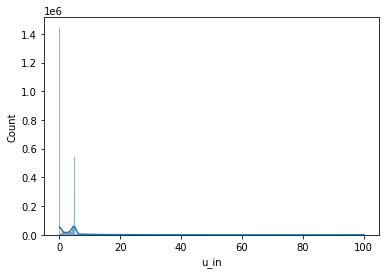

In [6]:
sns.histplot((df_train['u_in']), kde=True)

# Histogram local u_in

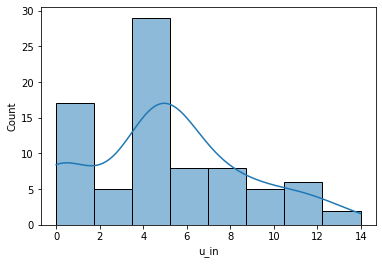

In [7]:
def u_in_local(df,value):
    df_loc = df.loc[df['breath_id'] == value]
    sns.histplot(df_loc['u_in'], kde=True)

u_in_local(df_train,2)

# Conclusion on **u_in** and **pressure**:
## We realized that the data do not have a normal distribution, which leads to many outliers.

# But, how does u_in behave in relation to pressure?

### added_index

#### Here we add an index to each temporal set. We know that each series has 80 columns, we will be numbering them from 1 to 80. This will help us to plot specific graphs for each series.

In [8]:
def added_index(df):
    aux = df.to_numpy()
    i=0
    auxx = []
    for line in aux:
        i=i+1
        auxx.append(i)
        if(i >=80 ):
            i=0
    auxx = pd.DataFrame(auxx,columns=['new_index'])
    return auxx['new_index']
df_train['new_index'] = added_index(df_train['id'])

#### Here we are going to create categorical data from columns R and C. This helps us to plot more specific graphs.

In [9]:
df_train['R'] = df_train['R'].astype(str)
df_train['C'] = df_train['C'].astype(str)
df_train['R__C'] = df_train["R"].astype(str) + '__' + df_train["C"].astype(str)
df_train['R'] = df_train['R'].astype(int)
df_train['C'] = df_train['C'].astype(int)
#df = pd.get_dummies(df_train)

## Let's continue plotting series 2 graphs (breath_id = 2). Notice what happens in pressure and u_in.

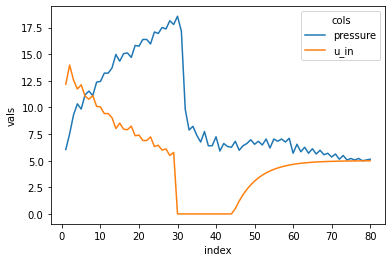

In [10]:
def plot_pressure_u_in(df,value):
    fmri = df.loc[df['breath_id'] == value]
    df_plot=pd.DataFrame()
    df_plot['index'] = fmri['new_index']
    df_plot['pressure'] = fmri['pressure']
    df_plot['u_in'] = fmri['u_in']
    
    df_plot = df_plot.melt('index', var_name='cols',  value_name='vals')
   # g = sns.factorplot(x="index", y="vals", hue='cols', data=df_plot)
    g = sns.lineplot(x="index", y="vals", hue='cols', data=df_plot)

   # sns.lineplot(data=fmri, x="new_index", y="pressure")
plot_pressure_u_in(df_train,2)

## And for other series?

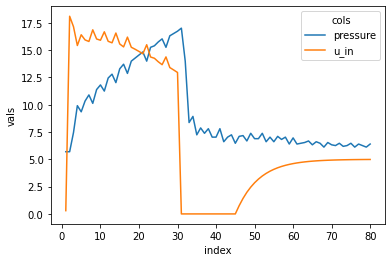

In [11]:
plot_pressure_u_in(df_train,2021)

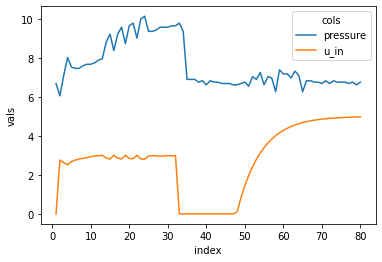

In [12]:
plot_pressure_u_in(df_train,2048)

# Now let's check time_step

### First: All training dataframe

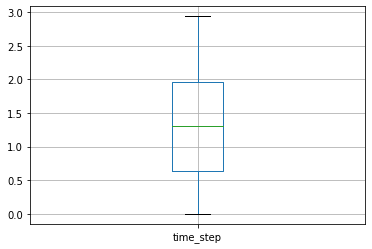

In [13]:
boxplot = df_train.boxplot(column=['time_step'])

## Now just a series

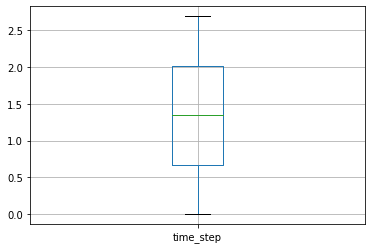

In [14]:
def time_step_local(df,value):
    df_loc = df.loc[df['breath_id'] == value]
    #sns.histplot(df_loc['time_step'], kde=True)
    boxplot = df_loc.boxplot(column=['time_step'])
time_step_local(df_train,2)

# And u_out?

## All training dataframe

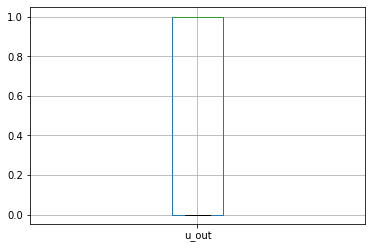

In [15]:
boxplot = df_train.boxplot(column=['u_out'])

## just a series

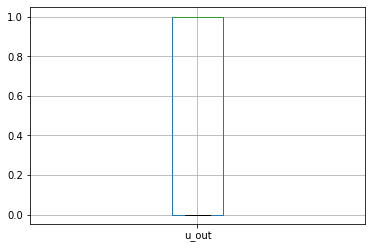

In [16]:
def u_out_local(df,value):
    df_loc = df.loc[df['breath_id'] == value]
    #sns.histplot(df_loc['u_out'], kde=True)
    boxplot = df_loc.boxplot(column=['u_out'])
u_out_local(df_train,2)